In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Load CSV correctly
df = pd.read_csv("store.csv")

# Quick check
print(df.shape)
print(df.head())


(51290, 25)
   row_id         order_id  order_date   ship_date       ship_mode  \
0   42433     AG-2011-2040  01/01/2011  01/06/2011  Standard Class   
1   22253    IN-2011-47883  01/01/2011  01/08/2011  Standard Class   
2   48883     HU-2011-1220  01/01/2011  01/05/2011    Second Class   
3   11731  IT-2011-3647632  01/01/2011  01/05/2011    Second Class   
4   22255    IN-2011-47883  01/01/2011  01/08/2011  Standard Class   

  customer_id    customer_name      segment         city            state  \
0    TB-11280  Toby Braunhardt     Consumer  Constantine      Constantine   
1    JH-15985      Joseph Holt     Consumer  Wagga Wagga  New South Wales   
2      AT-735    Annie Thurman     Consumer     Budapest         Budapest   
3    EM-14140     Eugene Moren  Home Office    Stockholm        Stockholm   
4    JH-15985      Joseph Holt     Consumer  Wagga Wagga  New South Wales   

   ...         category  sub-category                 product_name    sales  \
0  ...  Office Supplies  

In [74]:
df.head()


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,sales_year
0,42433,AG-2011-2040,01/01/2011,01/06/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,22253,IN-2011-47883,01/01/2011,01/08/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,48883,HU-2011-1220,01/01/2011,01/05/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,11731,IT-2011-3647632,01/01/2011,01/05/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,22255,IN-2011-47883,01/01/2011,01/08/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [75]:
df.tail()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,sales_year
51285,32593,CA-2014-115427,31/12/2014,01/04/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium,2014
51286,47594,MO-2014-2560,31/12/2014,01/05/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium,2014
51287,8857,MX-2014-110527,31/12/2014,01/02/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium,2014
51288,6852,MX-2014-114783,31/12/2014,01/06/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium,2014
51289,36388,CA-2014-156720,31/12/2014,01/04/2015,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.17,Medium,2014


In [76]:
df.shape

(51290, 25)

In [77]:
df.dtypes

row_id              int64
order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_id        object
customer_name      object
segment            object
city               object
state              object
country            object
postal_code       float64
market             object
region             object
product_id         object
category           object
sub-category       object
product_name       object
sales             float64
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
sales_year          int64
dtype: object

In [78]:
df.isnull()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,sales_year
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51286,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51287,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51288,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [79]:
df.isnull().sum()

row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
city              0
state             0
country           0
postal_code       2
market            0
region            0
product_id        0
category          0
sub-category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
sales_year        0
dtype: int64

In [80]:
df.describe() 

,row_id,postal_code,sales,quantity,discount,profit,shipping_cost,sales_year
count,51290.00000,51288.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,14823.766066,246.490581,3.476545,0.142908,28.610982,26.375915,2012.777208
std,14806.29199,24477.078229,487.565361,2.278766,0.212280,174.340972,57.296804,1.098931
min,1.00000,1000.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,12823.25000,3462.000000,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,25645.50000,6013.000000,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,38467.75000,8463.000000,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [81]:
df.isnull().any() 

row_id            False
order_id          False
order_date        False
ship_date         False
ship_mode         False
customer_id       False
customer_name     False
segment           False
city              False
state             False
country           False
postal_code        True
market            False
region            False
product_id        False
category          False
sub-category      False
product_name      False
sales             False
quantity          False
discount          False
profit            False
shipping_cost     False
order_priority    False
sales_year        False
dtype: bool

In [82]:
df.isnull().sum()/df.shape[0]*100

row_id            0.000000
order_id          0.000000
order_date        0.000000
ship_date         0.000000
ship_mode         0.000000
customer_id       0.000000
customer_name     0.000000
segment           0.000000
city              0.000000
state             0.000000
country           0.000000
postal_code       0.003899
market            0.000000
region            0.000000
product_id        0.000000
category          0.000000
sub-category      0.000000
product_name      0.000000
sales             0.000000
quantity          0.000000
discount          0.000000
profit            0.000000
shipping_cost     0.000000
order_priority    0.000000
sales_year        0.000000
dtype: float64

In [83]:
df.describe(include="object")

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,sub-category,product_name,order_priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25035,1430,1464,4,1590,795,3,3636,1094,147,7,13,10292,3,17,3788,4
top,CA-2014-100111,18/06/2014,22/11/2014,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium
freq,14,135,130,30775,97,108,26518,915,2001,9994,11002,11117,35,31273,6152,227,29433


In [84]:
df.describe(include="int"  )

,row_id,quantity,sales_year
count,51290.00000,51290.000000,51290.000000
mean,25645.50000,3.476545,2012.777208
std,14806.29199,2.278766,1.098931
min,1.00000,1.000000,2011.000000
25%,12823.25000,2.000000,2012.000000
50%,25645.50000,3.000000,2013.000000
75%,38467.75000,5.000000,2014.000000
max,51290.00000,14.000000,2014.000000


In [85]:
df.describe(include="float"  )

,postal_code,sales,discount,profit,shipping_cost
count,51288.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,14823.766066,246.490581,0.142908,28.610982,26.375915
std,24477.078229,487.565361,0.212280,174.340972,57.296804
min,1000.000000,0.444000,0.000000,-6599.978000,0.000000
25%,3462.000000,30.758625,0.000000,0.000000,2.610000
50%,6013.000000,85.053000,0.000000,9.240000,7.790000
75%,8463.000000,251.053200,0.200000,36.810000,24.450000
max,99301.000000,22638.480000,0.850000,8399.976000,933.570000


In [86]:
df.duplicated().sum()

np.int64(0)

In [87]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("****" * 10)

order_id
CA-2014-100111     14
IN-2012-41261      13
IN-2013-42311      13
TO-2014-9950       13
NI-2014-8880       13
                   ..
IN-2011-36074       1
ES-2011-5460465     1
CA-2011-104269      1
ES-2011-1517387     1
IN-2011-56738       1
Name: count, Length: 25035, dtype: int64
****************************************
order_date
18/06/2014    135
18/11/2014    127
09/03/2014    126
20/11/2014    118
29/12/2014    116
             ... 
23/03/2014      1
19/02/2012      1
19/01/2014      1
11/10/2013      1
01/02/2011      1
Name: count, Length: 1430, dtype: int64
****************************************
ship_date
22/11/2014    130
09/07/2014    115
17/11/2014    101
12/07/2014    101
29/11/2014    100
             ... 
25/01/2011      3
01/07/2015      3
01/03/2011      2
01/05/2011      2
01/06/2011      2
Name: count, Length: 1464, dtype: int64
****************************************
ship_mode
Standard Class    30775
Second Class      10309
First Class        7505
Same D

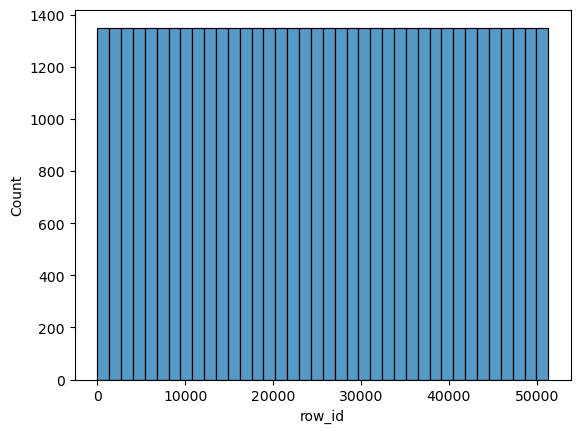

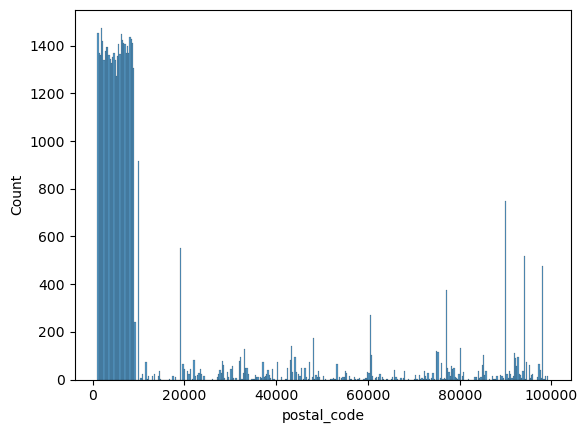

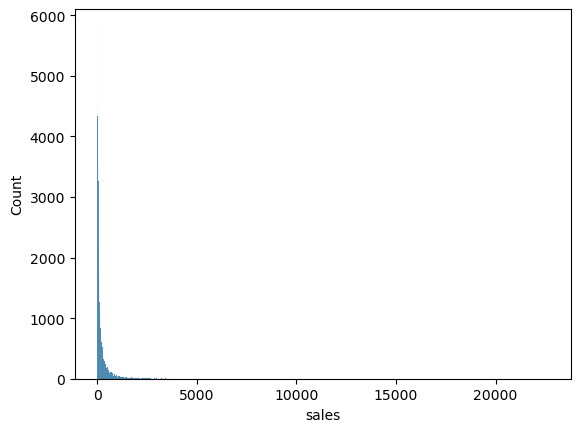

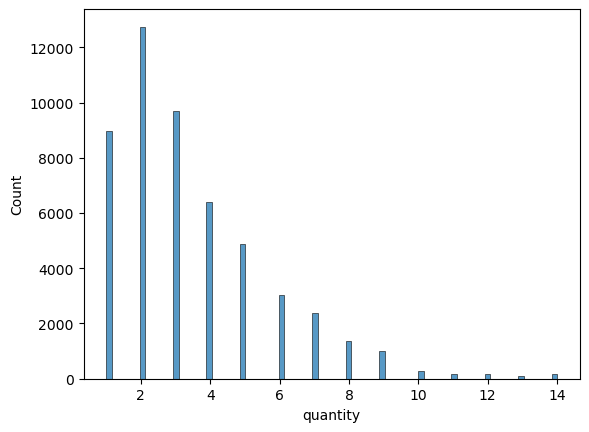

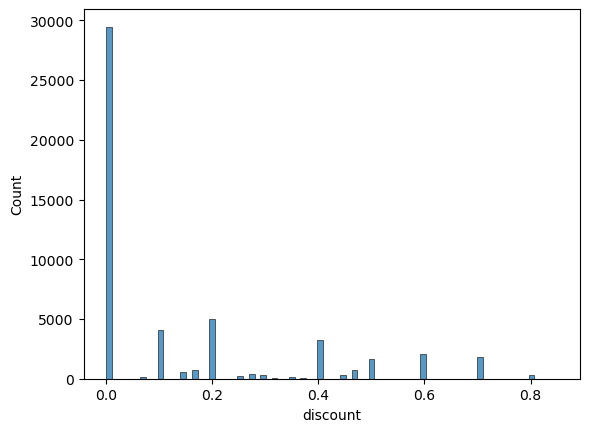

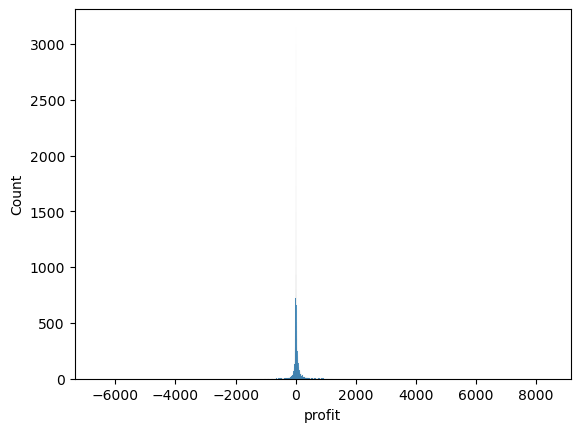

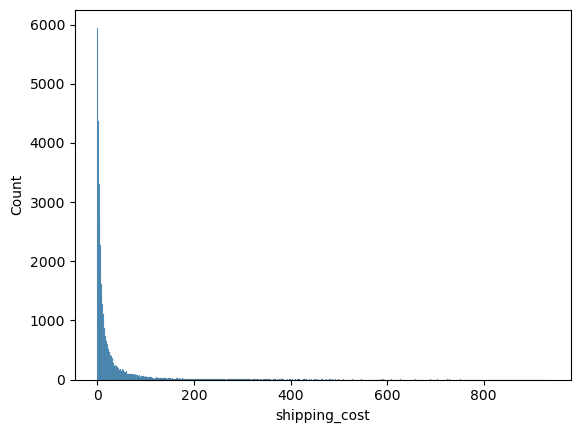

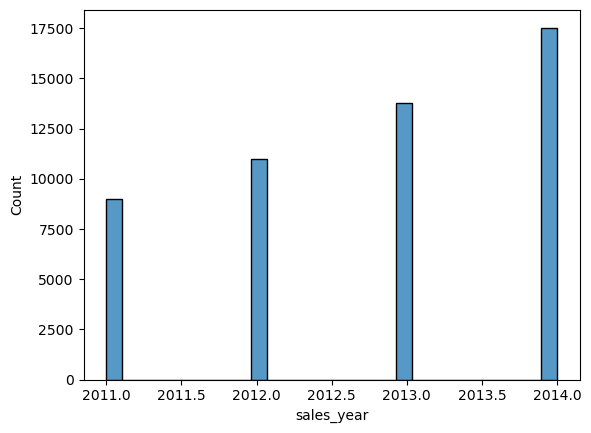

In [91]:
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

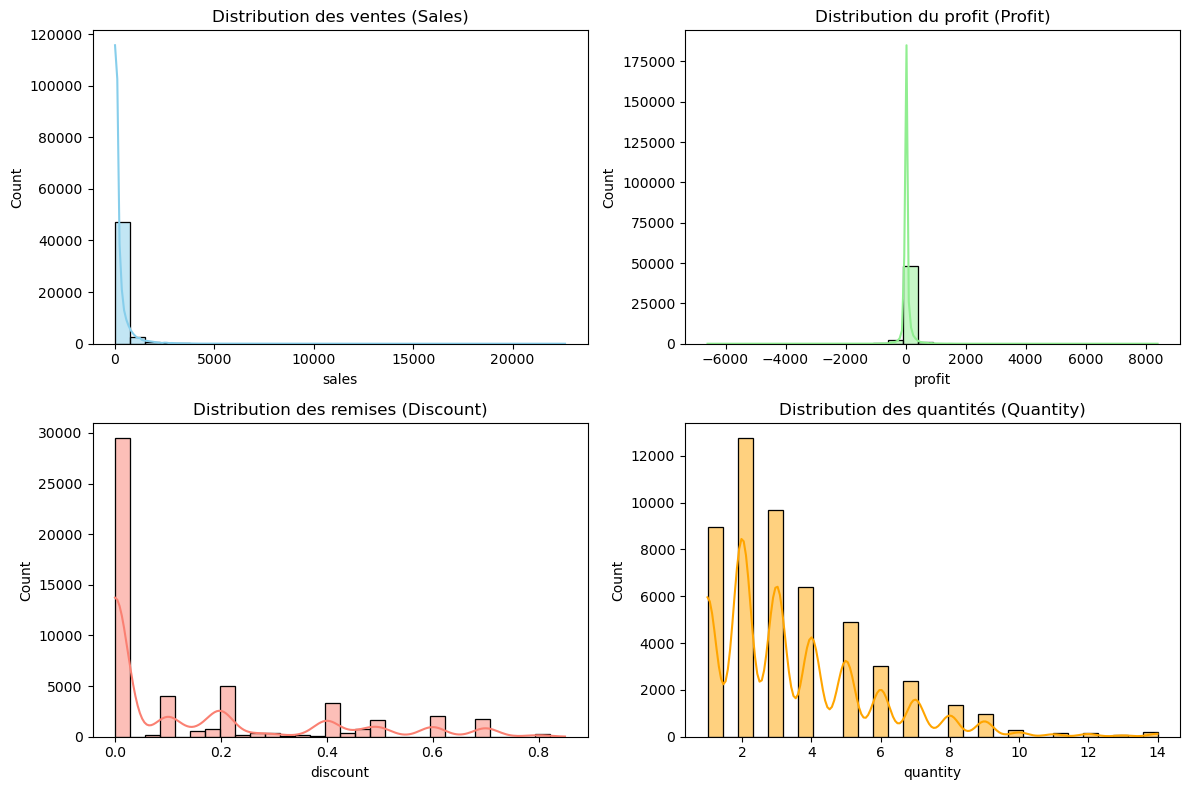

In [94]:
 
plt.figure(figsize=(12,8))

# Sales
plt.subplot(2,2,1)
sns.histplot(df['sales'], bins=30, kde=True, color='skyblue')
plt.title('Distribution des ventes (Sales)')

# Profit
plt.subplot(2,2,2)
sns.histplot(df['profit'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution du profit (Profit)')

# Discount
plt.subplot(2,2,3)
sns.histplot(df['discount'], bins=30, kde=True, color='salmon')
plt.title('Distribution des remises (Discount)')

# Quantity
plt.subplot(2,2,4)
sns.histplot(df['quantity'], bins=30, kde=True, color='orange')
plt.title('Distribution des quantités (Quantity)')

plt.tight_layout()
plt.show()


In [113]:
df_clean = df.copy()

In [114]:
 
print("=== Info ===")
print(df_clean.info())
print("\n=== Missing values ===")
print(df_clean.isnull().sum())

=== Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          51290 non-null  int64  
 1   order_id        51290 non-null  object 
 2   order_date      51290 non-null  object 
 3   ship_date       51290 non-null  object 
 4   ship_mode       51290 non-null  object 
 5   customer_id     51290 non-null  object 
 6   customer_name   51290 non-null  object 
 7   segment         51290 non-null  object 
 8   city            51290 non-null  object 
 9   state           51290 non-null  object 
 10  country         51290 non-null  object 
 11  postal_code     51288 non-null  float64
 12  market          51290 non-null  object 
 13  region          51290 non-null  object 
 14  product_id      51290 non-null  object 
 15  category        51290 non-null  object 
 16  sub-category    51290 non-null  object 
 17  product_name    51

In [116]:
# --- CONVERSION DES TYPES ---

# Convertir les colonnes de dates en datetime
df_clean['order_date'] = pd.to_datetime(df_clean['order_date'], errors='coerce')
df_clean['ship_date'] = pd.to_datetime(df_clean['ship_date'], errors='coerce')

# Convertir les colonnes numériques
numeric_cols = ['sales', 'quantity', 'discount', 'profit', 'shipping_cost', 'sales_year']
df_clean[numeric_cols] = df_clean[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Supprimer les doublons
df_clean.drop_duplicates(inplace=True)



=== Statistical summary (numeric) ===
              sales      quantity      discount        profit  shipping_cost  \
count  51290.000000  51290.000000  51290.000000  51290.000000   51290.000000   
mean     246.490581      3.476545      0.142908     28.610982      26.375915   
std      487.565361      2.278766      0.212280    174.340972      57.296804   
min        0.444000      1.000000      0.000000  -6599.978000       0.000000   
25%       30.758625      2.000000      0.000000      0.000000       2.610000   
50%       85.053000      3.000000      0.000000      9.240000       7.790000   
75%      251.053200      5.000000      0.200000     36.810000      24.450000   
max    22638.480000     14.000000      0.850000   8399.976000     933.570000   

         sales_year  
count  51290.000000  
mean    2012.777208  
std        1.098931  
min     2011.000000  
25%     2012.000000  
50%     2013.000000  
75%     2014.000000  
max     2014.000000  


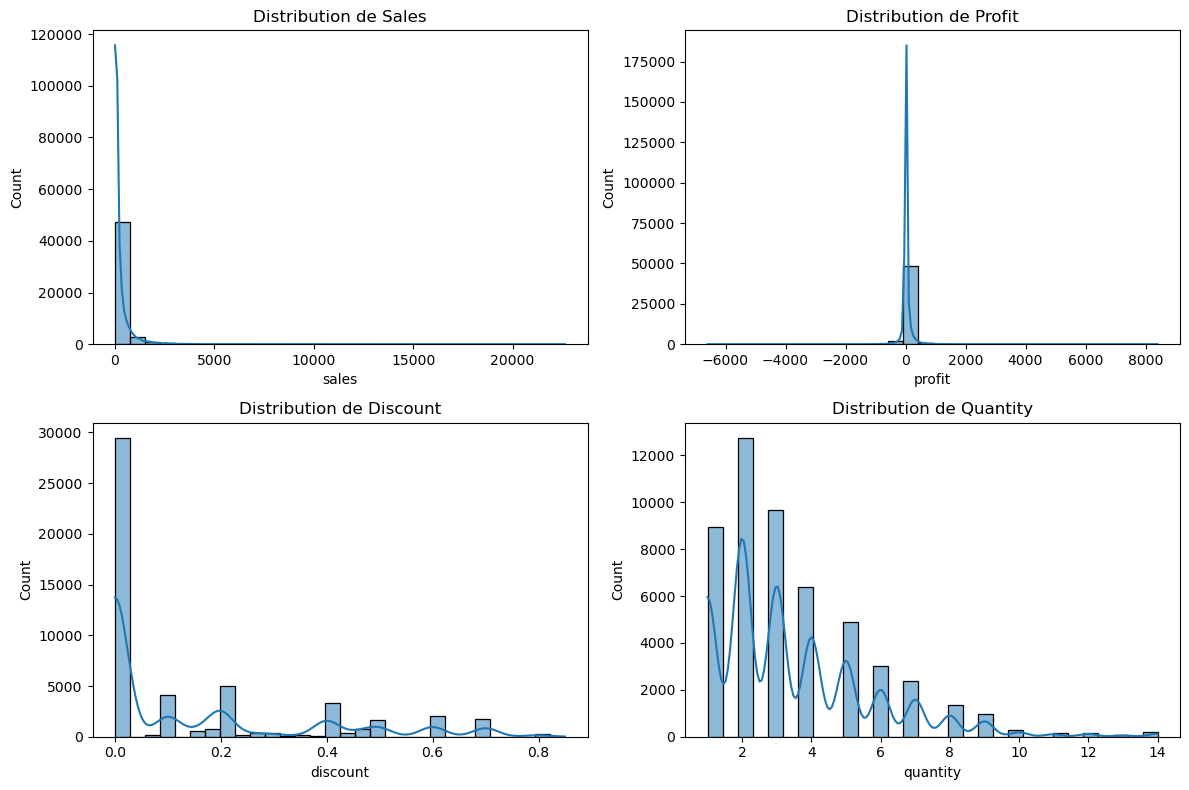

In [117]:
# --- STATISTIQUES NUMÉRIQUES ---
print("\n=== Statistical summary (numeric) ===")
print(df_clean[numeric_cols].describe())

# --- DISTRIBUTIONS ---
plt.figure(figsize=(12,8))
for i, col in enumerate(['sales', 'profit', 'discount', 'quantity'], start=1):
    plt.subplot(2,2,i)
    sns.histplot(df_clean[col], bins=30, kde=True)
    plt.title(f"Distribution de {col.capitalize()}")
plt.tight_layout()
plt.show()


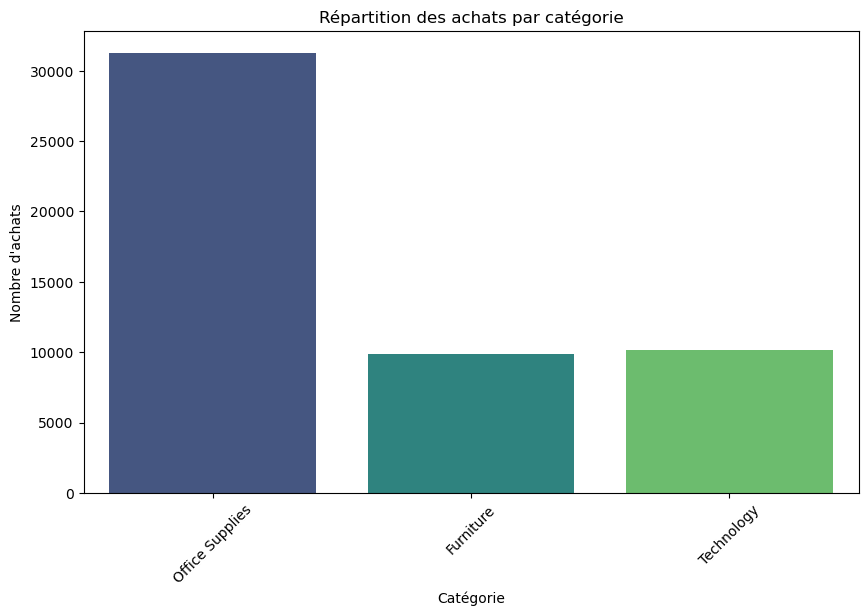

In [118]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_clean, x='category', hue='category', palette='viridis', legend=False)
plt.title("Répartition des achats par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Nombre d'achats")
plt.xticks(rotation=45)
plt.show()


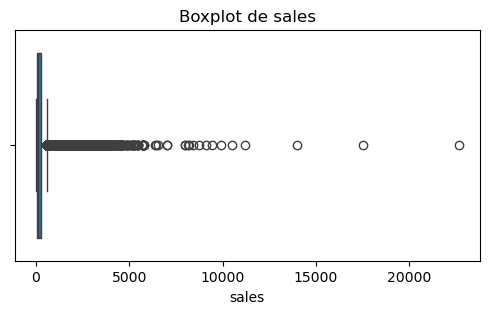

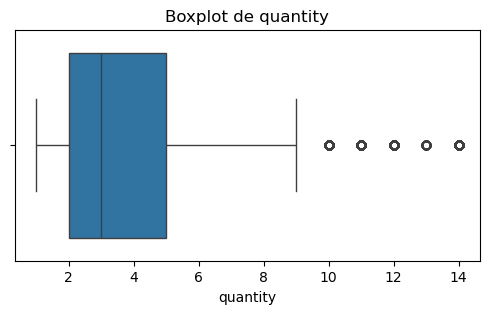

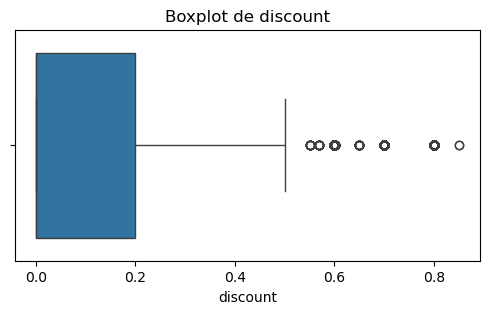

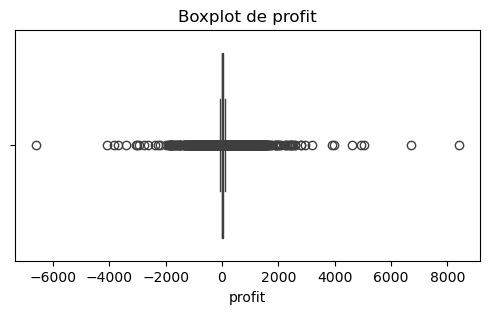

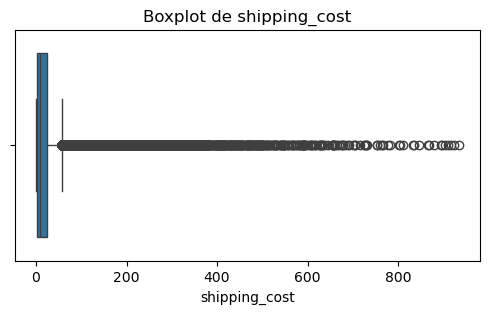

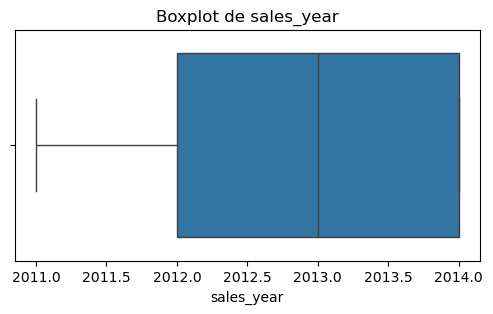

In [120]:
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(data=df_clean, x=col)
    plt.title(f"Boxplot de {col}")
    plt.show()




=== Correlation matrix ===
                  sales  quantity  discount    profit  shipping_cost  \
sales          1.000000  0.313577 -0.086722  0.484918       0.768073   
quantity       0.313577  1.000000 -0.019875  0.104365       0.272649   
discount      -0.086722 -0.019875  1.000000 -0.316490      -0.079056   
profit         0.484918  0.104365 -0.316490  1.000000       0.354441   
shipping_cost  0.768073  0.272649 -0.079056  0.354441       1.000000   
sales_year    -0.002905 -0.005049 -0.005894  0.002626      -0.003136   

               sales_year  
sales           -0.002905  
quantity        -0.005049  
discount        -0.005894  
profit           0.002626  
shipping_cost   -0.003136  
sales_year       1.000000  


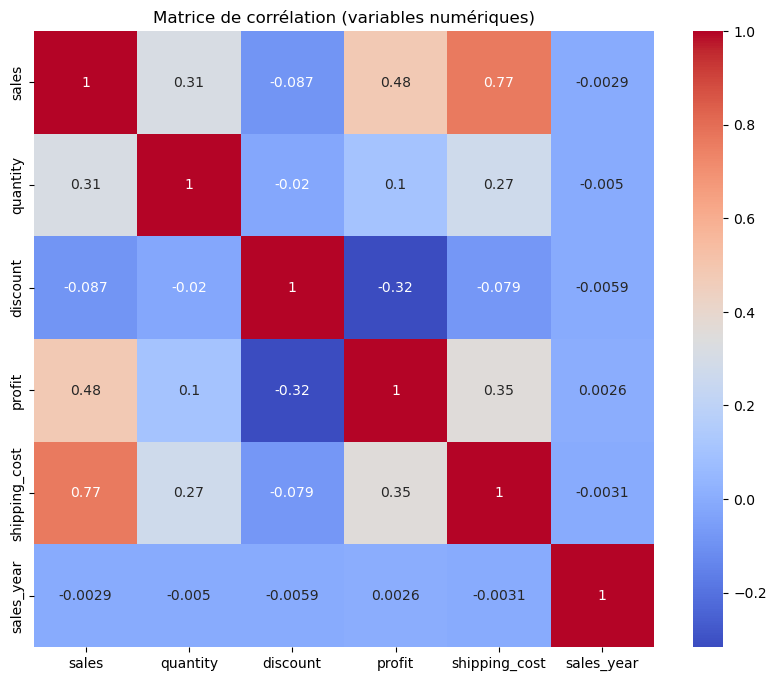

In [121]:
corr_matrix = df_clean[numeric_cols].corr()
print("\n=== Correlation matrix ===")
print(corr_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation (variables numériques)")
plt.show()


In [122]:
# --- SUPPRESSION DES OUTLIERS NUMÉRIQUES ---
for col in ['sales', 'profit', 'discount', 'quantity']:
    # Supprimer les valeurs négatives si non logiques
    neg_values = df_clean[df_clean[col] < 0]
    if not neg_values.empty:
        print(f"Suppression de {len(neg_values)} valeurs négatives pour {col}")
        df_clean.drop(neg_values.index, inplace=True)
    
    # Supprimer les outliers extrêmes (rare <1%)
    Q1, Q3 = df_clean[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    extreme_outliers = df_clean[
        (df_clean[col] < Q1 - 3 * IQR) | (df_clean[col] > Q3 + 3 * IQR)
    ]
    if len(extreme_outliers) / len(df_clean) < 0.01:
        print(f"Suppression de {len(extreme_outliers)} outliers extrêmes pour {col}")
        df_clean.drop(extreme_outliers.index, inplace=True)

print("\nShape après suppression d’outliers :", df_clean.shape)


Suppression de 12544 valeurs négatives pour profit
Suppression de 0 outliers extrêmes pour quantity

Shape après suppression d’outliers : (38746, 25)


In [123]:
# Supprimer les lignes où les dates sont manquantes (elles sont trop nombreuses)
df_clean.dropna(subset=['order_date', 'ship_date'], inplace=True)

# Supprimer aussi celles où postal_code est NaN
df_clean.dropna(subset=['postal_code'], inplace=True)

# Imputer valeurs numériques restantes (s’il en reste)
for col in numeric_cols:
    if df_clean[col].isna().sum() > 0:
        median_val = df_clean[col].median()
        print(f"Imputation de {col} avec médiane : {median_val:.2f}")
        df_clean[col] = df_clean[col].fillna(median_val)

# Nettoyage des catégories (uniformisation)
for col in ['category', 'sub-category']:
    df_clean[col] = df_clean[col].astype(str).str.strip().str.lower()

# Correction des fautes typographiques
df_clean['category'] = df_clean['category'].replace({
    'furnitures': 'furniture',
    'technologie': 'technology',
    'office supply': 'office supplies'
})

# Imputation par le mode (catégorielles)
for col in ['category', 'sub-category', 'ship_mode', 'region']:
    if df_clean[col].isna().sum() > 0:
        mode_val = df_clean[col].mode()[0]
        print(f"Imputation de {col} avec mode : {mode_val}")
        df_clean[col] = df_clean[col].fillna(mode_val)

print("\nValeurs manquantes après nettoyage :")
print(df_clean.isna().sum())



Valeurs manquantes après nettoyage :
row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
city              0
state             0
country           0
postal_code       0
market            0
region            0
product_id        0
category          0
sub-category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
sales_year        0
dtype: int64


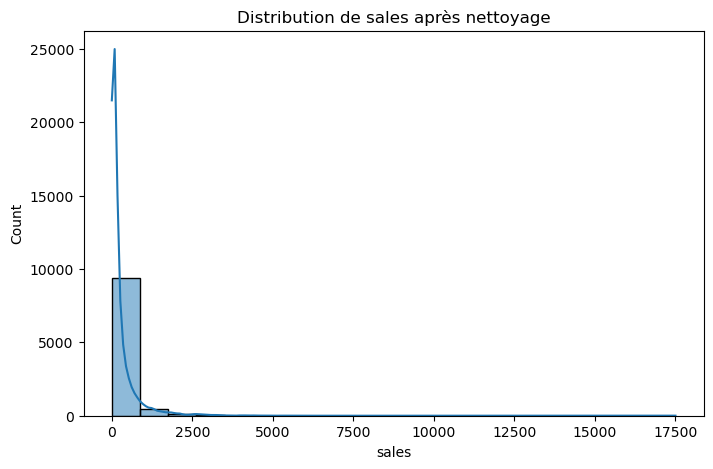

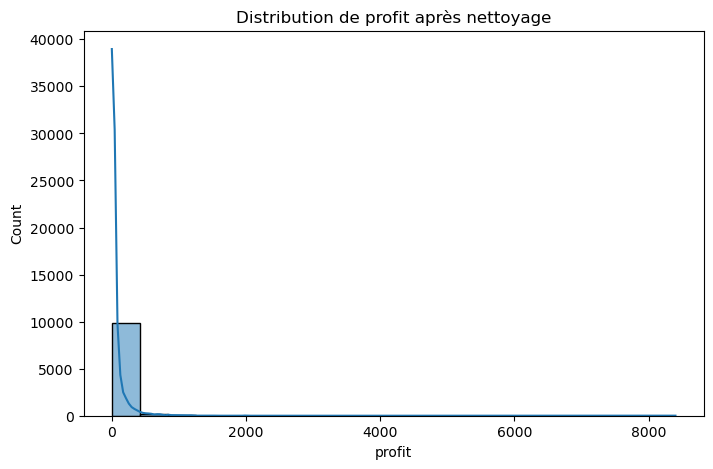

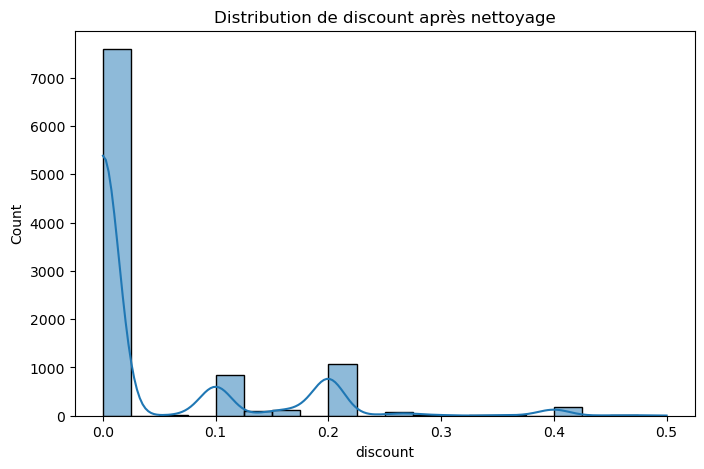

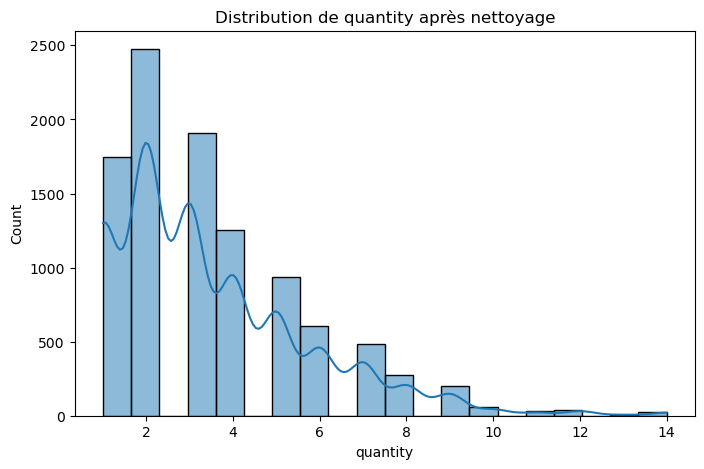

In [124]:
for col in ['sales', 'profit', 'discount', 'quantity']:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_clean[col], bins=20, kde=True)
    plt.title(f"Distribution de {col} après nettoyage")
    plt.show()


In [125]:
data_acp = df_clean.copy()
 


In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Colonnes numériques pertinentes
numeric_cols = ['sales', 'quantity', 'discount', 'profit', 'shipping_cost']

# Suppression des éventuels NaN restants (sécurité)
data_acp = data_acp.dropna(subset=numeric_cols)


In [127]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_acp[numeric_cols])

# Transformation en DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols)
print("✅ Données standardisées prêtes pour l'ACP.")


✅ Données standardisées prêtes pour l'ACP.


In [128]:
pca = PCA(n_components=len(numeric_cols))
pca_result = pca.fit_transform(X_scaled_df)

# DataFrame des composantes principales
pca_df = pd.DataFrame(
    pca_result,
    columns=[f'PC{i+1}' for i in range(len(numeric_cols))]
)
print("\n✅ ACP terminée :")
print(pca_df.head())



✅ ACP terminée :
        PC1       PC2       PC3       PC4       PC5
0  0.191882 -0.736346 -0.506796 -0.061097  0.094926
1 -0.478652  0.541456 -0.309575 -0.137967 -0.050857
2 -0.450513 -0.342283  0.521472 -0.087657 -0.085336
3 -0.275433  0.848925  0.488951 -0.249329 -0.077966
4 -0.815048  0.409776 -0.645822 -0.127080 -0.029097


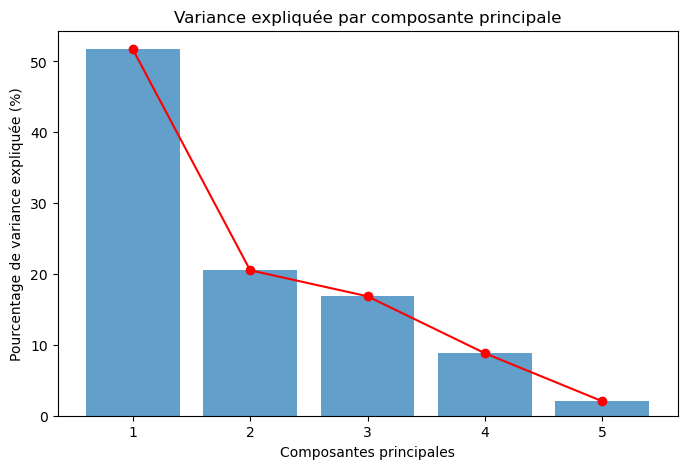

Variance expliquée par chaque composante : [51.75332479 20.53676747 16.8565876   8.8162684   2.03705174]
Cumul de variance expliquée : [ 51.75332479  72.29009226  89.14667986  97.96294826 100.        ]


In [129]:
explained_var = pca.explained_variance_ratio_ * 100

plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.7)
plt.plot(range(1, len(explained_var)+1), explained_var, 'r-o')
plt.title("Variance expliquée par composante principale")
plt.xlabel("Composantes principales")
plt.ylabel("Pourcentage de variance expliquée (%)")
plt.xticks(range(1, len(explained_var)+1))
plt.show()

# Cumul de variance expliquée
cum_var = explained_var.cumsum()
print("Variance expliquée par chaque composante :", explained_var)
print("Cumul de variance expliquée :", cum_var)


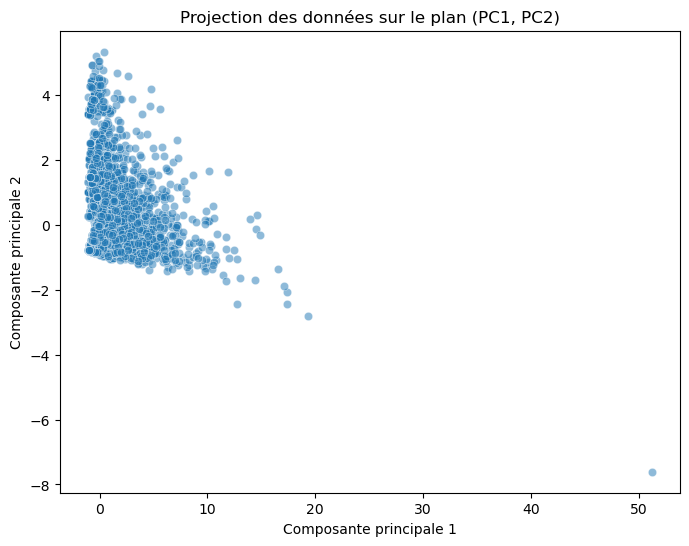

In [130]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], alpha=0.5)
plt.title("Projection des données sur le plan (PC1, PC2)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()


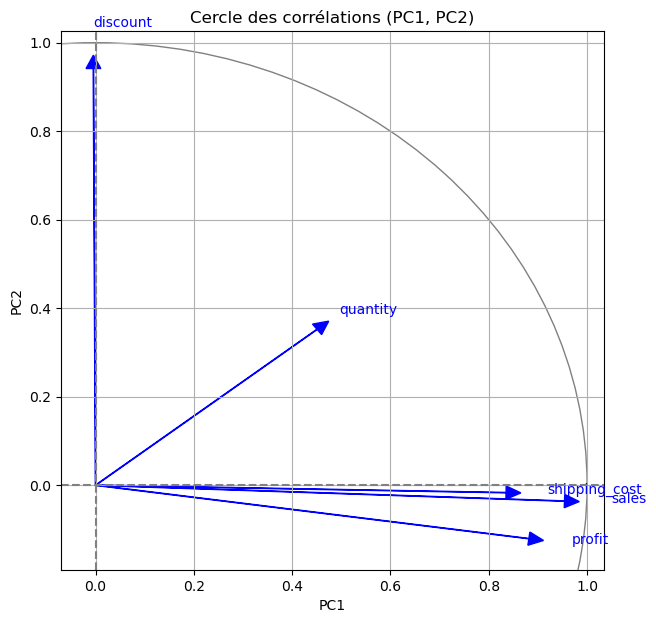

In [131]:
import numpy as np

# Matrice des corrélations entre variables et composantes
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(7,7))
for i, var in enumerate(numeric_cols):
    plt.arrow(0, 0, loadings[i,0], loadings[i,1],
              head_width=0.03, head_length=0.03, color='b')
    plt.text(loadings[i,0]*1.1, loadings[i,1]*1.1, var, color='b')

# Cercle unité
circle = plt.Circle((0,0), 1, color='gray', fill=False)
plt.gca().add_artist(circle)

plt.title("Cercle des corrélations (PC1, PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()


In [133]:
 
for i, var in enumerate(explained_var):
    print(f"PC{i+1}: {var:.2f}% de la variance expliquée")

print(f"\n➡️ Variance cumulée sur les 2 premières composantes : {cum_var[1]:.2f}%")


PC1: 51.75% de la variance expliquée
PC2: 20.54% de la variance expliquée
PC3: 16.86% de la variance expliquée
PC4: 8.82% de la variance expliquée
PC5: 2.04% de la variance expliquée

➡️ Variance cumulée sur les 2 premières composantes : 72.29%


C:\Users\sbiss\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


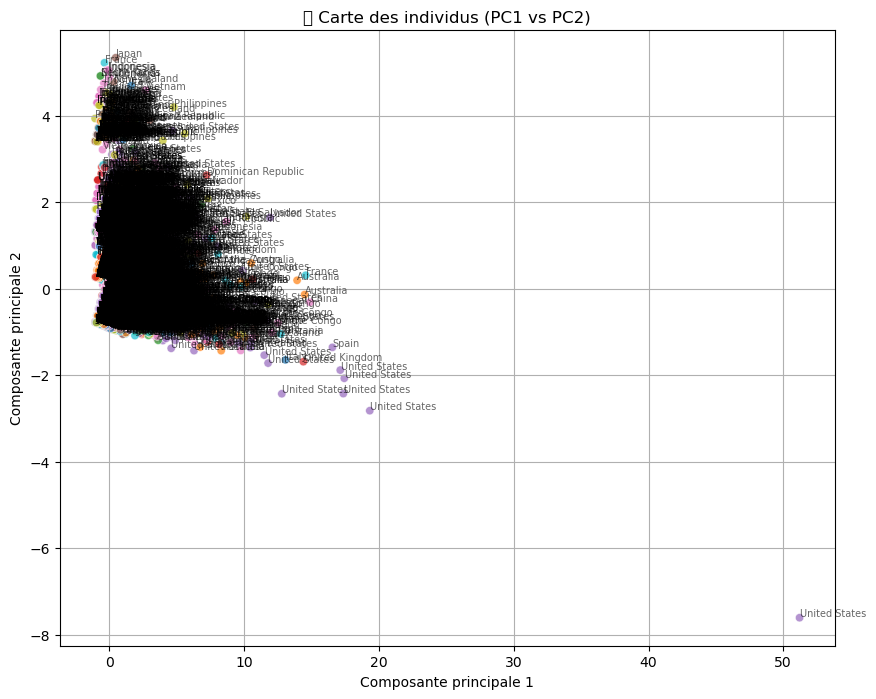

In [134]:
# ✅ Ajout des noms de pays au DataFrame ACP
pca_df['country'] = data_acp['country'].values

# --- Carte des individus ---
plt.figure(figsize=(10,8))
sns.scatterplot(
    x='PC1', y='PC2', 
    data=pca_df, 
    hue='country', 
    palette='tab10', 
    legend=False, alpha=0.7
)

# Ajouter le nom du pays sur chaque point (optionnel, peut être lourd si beaucoup)
for i in range(pca_df.shape[0]):
    plt.text(
        pca_df.PC1[i]+0.02, pca_df.PC2[i]+0.02, 
        str(pca_df.country[i]), fontsize=7, alpha=0.6
    )

plt.title("🌍 Carte des individus (PC1 vs PC2)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.show()


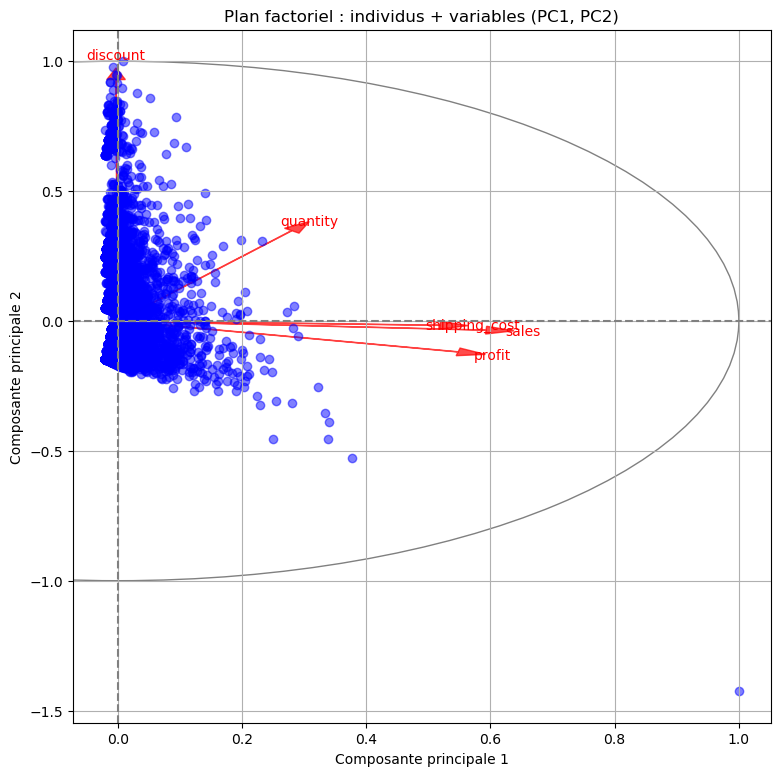

In [135]:
import numpy as np

# --- Préparer le cercle des corrélations ---
plt.figure(figsize=(9,9))

# 1️⃣ Cercle unité
circle = plt.Circle((0, 0), 1, color='gray', fill=False)
plt.gca().add_artist(circle)

# 2️⃣ Vecteurs des variables (loadings)
for i, var in enumerate(numeric_cols):
    plt.arrow(0, 0, 
              pca.components_[0, i], 
              pca.components_[1, i],
              color='r', alpha=0.7, head_width=0.03)
    plt.text(pca.components_[0, i]*1.1, 
             pca.components_[1, i]*1.1, 
             var, color='r', ha='center', va='center')

# 3️⃣ Points des individus (centrés-réduits)
plt.scatter(pca_df['PC1']/max(pca_df['PC1']), 
            pca_df['PC2']/max(pca_df['PC2']), 
            alpha=0.5, color='b')

plt.title("Plan factoriel : individus + variables (PC1, PC2)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()


In [136]:
# --- K-MEANS CLUSTERING ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# --- Étape 1 : Copier le jeu de données ---
data_kmeans = data_acp.copy()

In [138]:
# --- Étape 2 : Normalisation ---
X = data_kmeans.select_dtypes(include=[np.number])   
X_scaled = StandardScaler().fit_transform(X)

In [139]:

# --- Étape 3 : Détermination du nombre optimal de clusters (méthode du coude + silhouette) ---
inertias = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=12, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

Text(0, 0.5, 'Inertie')

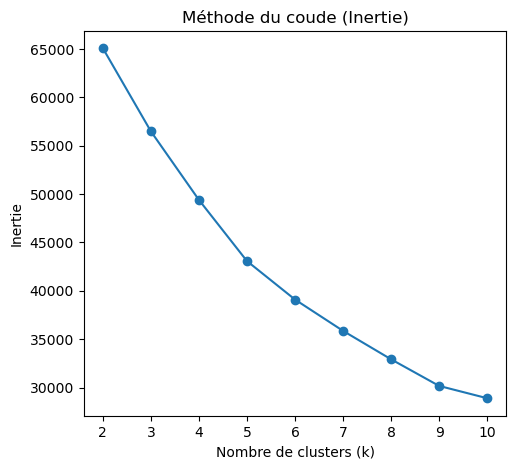

In [140]:
# Affichage du coude
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(2,11), inertias, marker='o')
plt.title("Méthode du coude (Inertie)")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")

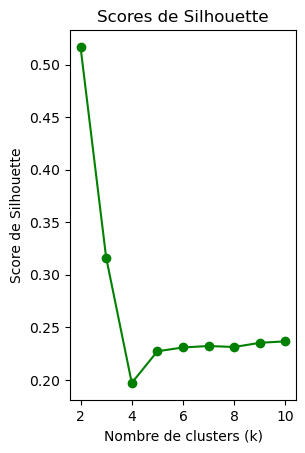

In [141]:
# Affichage du score de silhouette
plt.subplot(1,2,2)
plt.plot(range(2,11), silhouette_scores, marker='o', color='green')
plt.title("Scores de Silhouette")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score de Silhouette")
plt.show()

In [143]:
# --- Étape 4 : Appliquer K-Means avec le k choisi (exemple k=3) ---
clusterNum = 3
kmeans = KMeans(n_clusters=clusterNum, init='k-means++', n_init=12, random_state=42)
labels = kmeans.fit_predict(X_scaled)
centers = kmeans.cluster_centers_

In [144]:

# --- Étape 5 : Ajouter les labels au DataFrame ---
data_kmeans["Cluster"] = labels

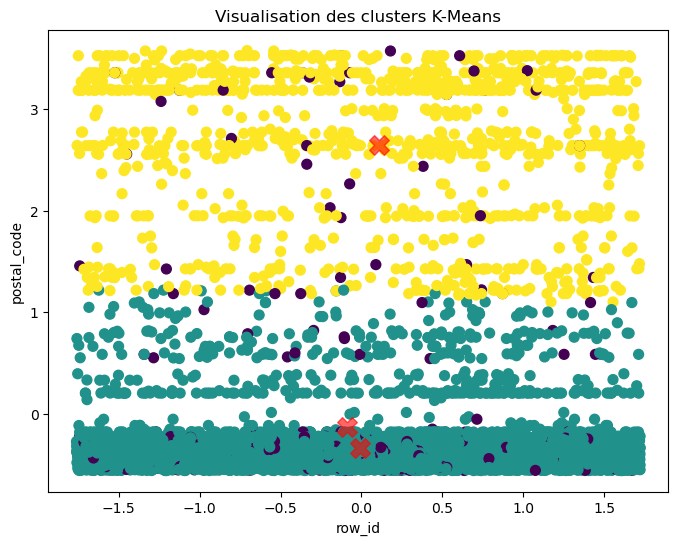

In [145]:
# --- Étape 6 : Visualisation 2D simple ---
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.6, marker='X')
plt.title("Visualisation des clusters K-Means")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()

In [146]:
# --- Étape 7 : Score de silhouette final ---
silhouette_avg = silhouette_score(X_scaled, labels)
print("✅ Score de Silhouette global :", silhouette_avg)

✅ Score de Silhouette global : 0.3164358387746355


In [147]:

# --- Étape 8 : Statistiques par cluster ---
print("\nRépartition des observations par cluster :")
print(data_kmeans["Cluster"].value_counts())

print("\nCentres des clusters (en valeurs normalisées) :")
print(pd.DataFrame(centers, columns=X.columns))


Répartition des observations par cluster :
Cluster
1    8420
2    1097
0     529
Name: count, dtype: int64

Centres des clusters (en valeurs normalisées) :
     row_id  postal_code     sales  quantity  discount    profit  \
0 -0.089028    -0.129503  3.129734  1.092479 -0.014254  2.604339   
1 -0.008187    -0.336044 -0.167342 -0.050177 -0.004434 -0.140614   
2  0.105768     2.641750 -0.224805 -0.141685  0.040904 -0.176597   

   shipping_cost  sales_year  
0       3.082255   -0.059482  
1      -0.165497    0.002905  
2      -0.216071    0.006389  


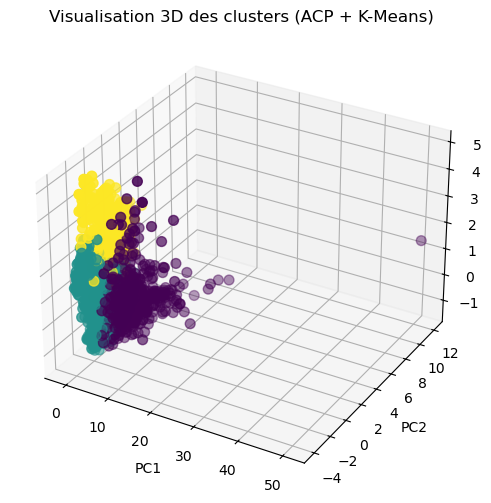

In [148]:
# --- Étape 9 : Visualisation 3D des clusters (si ACP faite avant) ---
from mpl_toolkits.mplot3d import Axes3D

# On suppose que tu as déjà data_acp et les composantes principales
# Si tu veux utiliser les deux premières composantes PCA pour la visualisation :
from sklearn.decomposition import PCA

pca_visu = PCA(n_components=3)
X_pca = pca_visu.fit_transform(X_scaled)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=labels, cmap='viridis', s=50)
ax.set_title("Visualisation 3D des clusters (ACP + K-Means)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

<Figure size 1000x600 with 0 Axes>

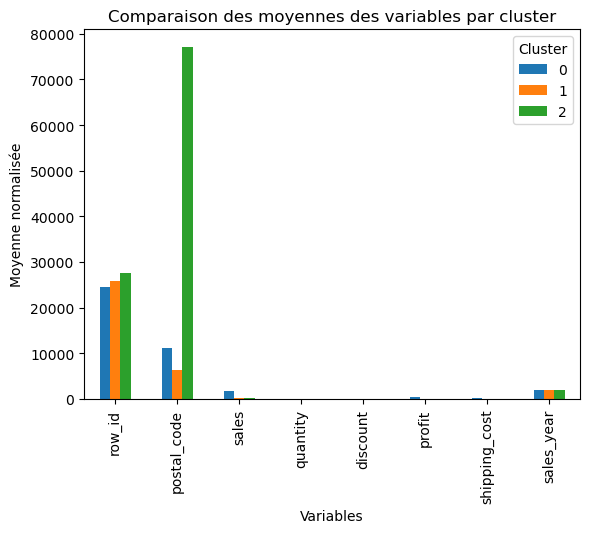

In [149]:
# --- Étape 10 : Visualiser les variables selon les clusters ---
cluster_means = data_kmeans.groupby("Cluster")[X.columns].mean()
plt.figure(figsize=(10,6))
cluster_means.T.plot(kind='bar')
plt.title("Comparaison des moyennes des variables par cluster")
plt.xlabel("Variables")
plt.ylabel("Moyenne normalisée")
plt.legend(title="Cluster")
plt.show()


In [150]:
# --- Étape 11 : Analyse descriptive par cluster ---
print("Analyse descriptive par cluster :")
for i in range(clusterNum):
    print(f"\nCluster {i}:")
    print(data_kmeans[data_kmeans["Cluster"] == i].describe().T)


Analyse descriptive par cluster :

Cluster 0:
               count                           mean                  min  \
row_id         529.0                   24619.540643                280.0   
order_date       529  2013-04-04 10:47:51.833648640  2011-01-04 00:00:00   
ship_date        529  2013-04-07 14:25:37.996219392  2011-01-09 00:00:00   
postal_code    529.0                   11207.708885               1042.0   
sales          529.0                    1827.966266               559.62   
quantity       529.0                       5.958412                  1.0   
discount       529.0                       0.043157                  0.0   
profit         529.0                     488.451496                  0.0   
shipping_cost  529.0                     220.392117                 2.38   
sales_year     529.0                    2012.695652               2011.0   
Cluster        529.0                            0.0                  0.0   

                               25%       

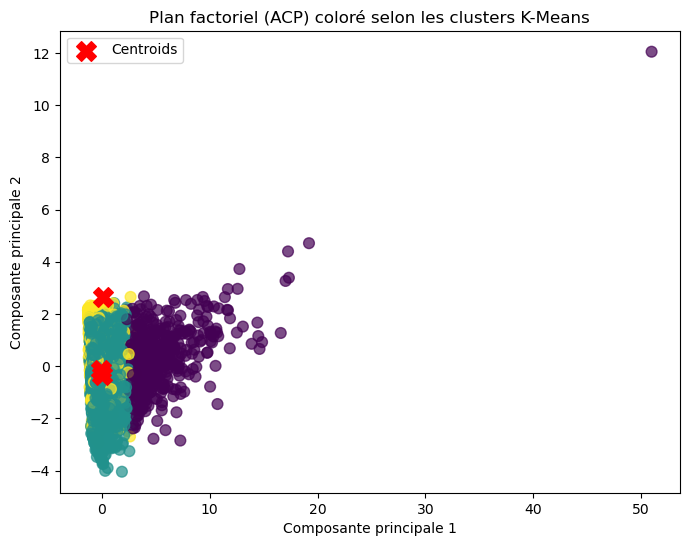

In [151]:
# --- Étape 12 : Corrélation entre ACP et clusters ---
# Si tu veux superposer les clusters sur le plan factoriel (2 premières composantes ACP)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=60, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='red', s=200, marker='X', label='Centroids')
plt.title("Plan factoriel (ACP) coloré selon les clusters K-Means")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend()
plt.show()

In [162]:

#DBSCAN
# --- Importations nécessaires ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Copie du dataset nettoyé
df_dbscan = df_clean.copy()


In [163]:
#   (ici : ventes, profit, remise et quantité)
features = df_dbscan[["sales", "profit", "discount", "quantity"]].values

In [165]:
# --- Standardisation ---
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
 

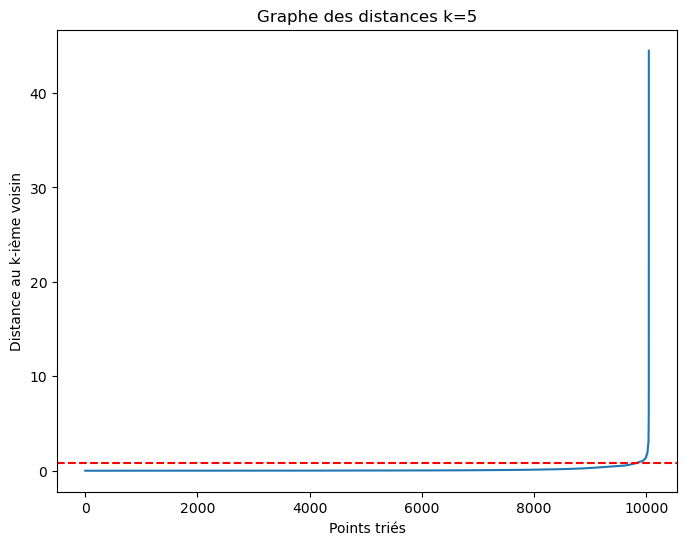

In [166]:
# --- Graphe des distances k ---
min_samples = 5
nbrs = NearestNeighbors(n_neighbors=min_samples)
nbrs.fit(features_scaled)
k_dists, _ = nbrs.kneighbors(features_scaled)
k_dists = np.sort(k_dists[:, -1])

plt.figure(figsize=(8,6))
plt.plot(k_dists)
plt.axhline(y=0.8, color='red', linestyle='--')  # adapte la valeur selon ton graphique
plt.title(f"Graphe des distances k={min_samples}")
plt.xlabel("Points triés")
plt.ylabel("Distance au k-ième voisin")
plt.show()

In [167]:
# --- Application de DBSCAN ---
eps = 0.8   # à ajuster selon le graphe ci-dessus
db = DBSCAN(eps=eps, min_samples=min_samples)
labels = db.fit_predict(features_scaled)

In [168]:
# --- Informations ---
unique_labels = np.unique(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print(f"Nombre de clusters trouvés : {n_clusters}")
print(f"Nombre de points de bruit : {n_noise}")


Nombre de clusters trouvés : 5
Nombre de points de bruit : 157


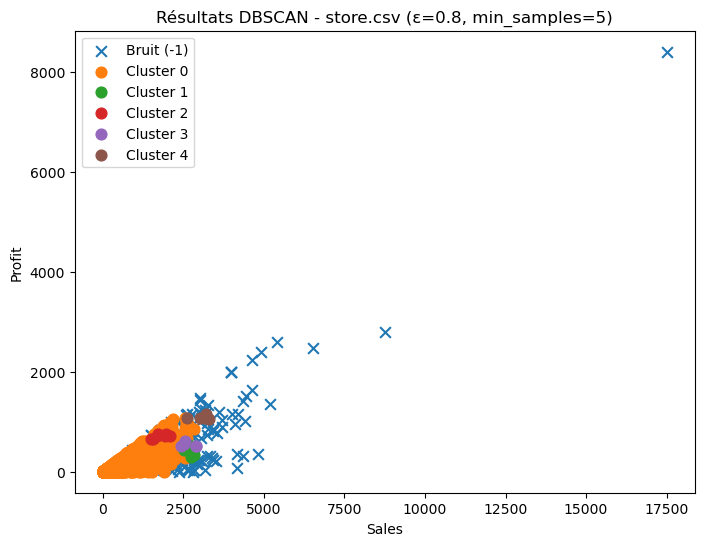

In [169]:

# --- Visualisation 2D (sales vs profit) ---
plt.figure(figsize=(8,6))
for c in unique_labels:
    mask = labels == c
    if c == -1:
        plt.scatter(features[mask,0], features[mask,1], marker="x", s=60, label="Bruit (-1)")
    else:
        plt.scatter(features[mask,0], features[mask,1], s=60, label=f"Cluster {c}")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title(f"Résultats DBSCAN - store.csv (ε={eps}, min_samples={min_samples})")
plt.legend()
plt.show()

In [170]:
# --- Ajouter les labels au DataFrame ---
df_dbscan["Cluster_DBSCAN"] = labels
df_dbscan.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,sales_year,Cluster_DBSCAN
0,42433,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,0
1,22253,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,0
2,48883,HU-2011-1220,2011-01-01,2011-01-05,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,0
4,22255,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,0
5,22254,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium,2011,0


In [171]:
# Exclure les points de bruit (-1)
clusters_summary = (
    df_dbscan[df_dbscan["Cluster_DBSCAN"] != -1]
    .groupby("Cluster_DBSCAN")
    [["sales", "profit", "discount", "quantity"]]
    .mean()
    .round(2)
)

print("📊 Moyenne des variables par cluster :")
print(clusters_summary)


📊 Moyenne des variables par cluster :
                  sales   profit  discount  quantity
Cluster_DBSCAN                                      
0                216.31    51.34      0.04      3.41
1               2708.10   395.25      0.00      6.50
2               1768.76   710.19      0.09      4.62
3               2650.73   543.76      0.10      5.20
4               3058.15  1087.88      0.00      5.80


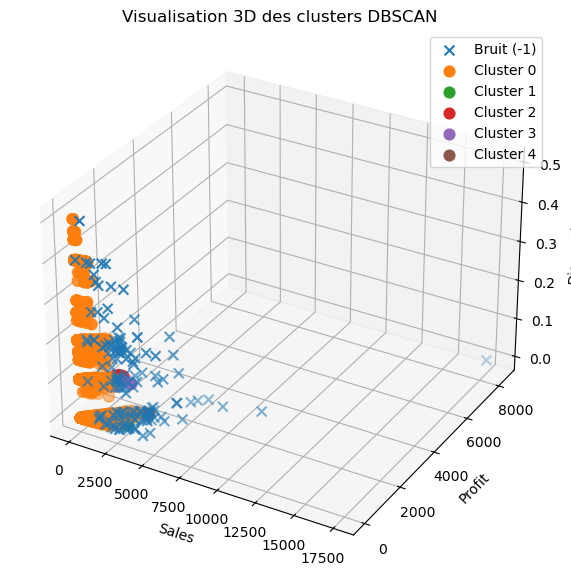

In [174]:
#Visualisation 3D (pour mieux comprendre la forme des clusters)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

for c in np.unique(labels):
    mask = labels == c
    if c == -1:
        ax.scatter(features[mask,0], features[mask,1], features[mask,2],
                   marker="x", s=50, label="Bruit (-1)")
    else:
        ax.scatter(features[mask,0], features[mask,1], features[mask,2],
                   s=60, label=f"Cluster {c}")

ax.set_xlabel("Sales")
ax.set_ylabel("Profit")
ax.set_zlabel("Discount")
ax.set_title("Visualisation 3D des clusters DBSCAN")
ax.legend()
plt.show()


In [175]:
from sklearn.metrics import silhouette_score

# Exclure le bruit (-1) avant d'évaluer
mask = labels != -1
if len(set(labels[mask])) > 1:
    sil_score = silhouette_score(features_scaled[mask], labels[mask])
    print(f"Score de silhouette (hors bruit) : {sil_score:.3f}")
else:
    print("Impossible de calculer le score de silhouette : un seul cluster détecté.")


Score de silhouette (hors bruit) : 0.621


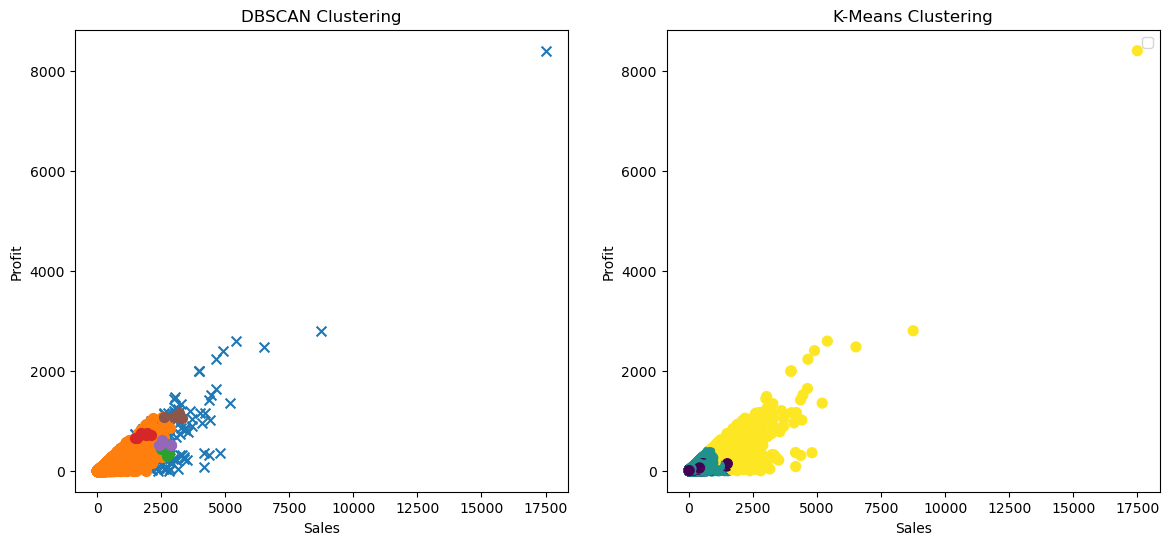

In [176]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

# DBSCAN
for c in np.unique(labels):
    m = labels == c
    if c == -1:
        ax1.scatter(features[m,0], features[m,1], marker="x", s=50, label="Bruit (-1)")
    else:
        ax1.scatter(features[m,0], features[m,1], s=50, label=f"Cluster {c}")
ax1.set_title("DBSCAN Clustering")
ax1.set_xlabel("Sales")
ax1.set_ylabel("Profit")

# K-Means
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=0)
km_labels = km.fit_predict(features_scaled)
ax2.scatter(features[:,0], features[:,1], c=km_labels, cmap='viridis', s=50)
ax2.set_title("K-Means Clustering")
ax2.set_xlabel("Sales")
ax2.set_ylabel("Profit")

plt.legend()
plt.show()
